For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import your implementation
from linear_regression import LinearRegression

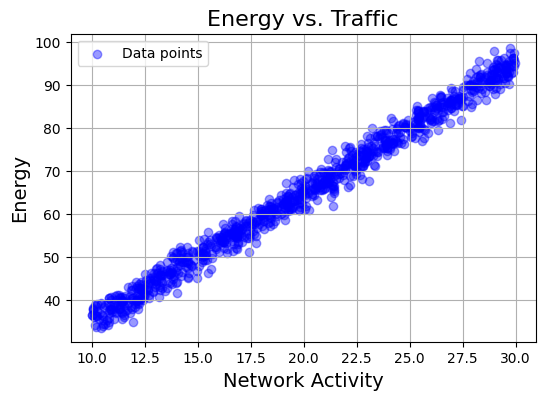

In [4]:
# Load data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', alpha=0.4, label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

Weights: [3.00881158], Bias: 4.889213023830038


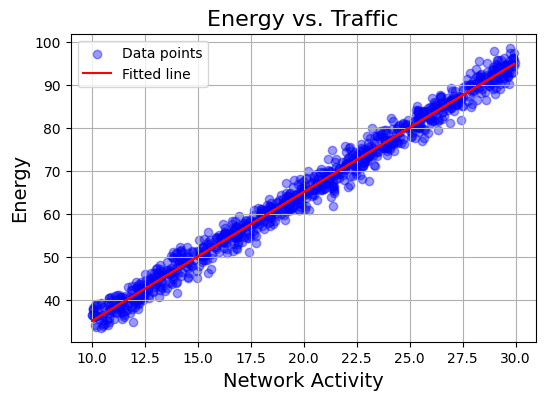

Formula: 3.01 * Net_Activity + 4.89


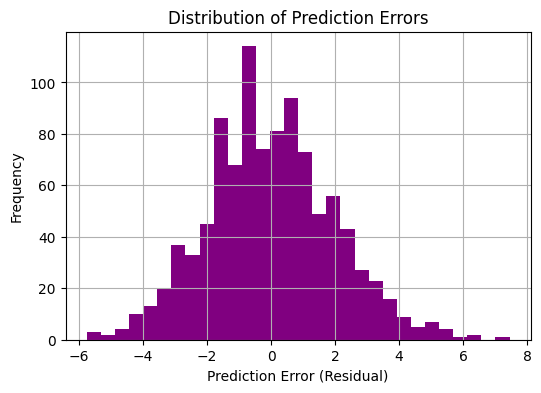

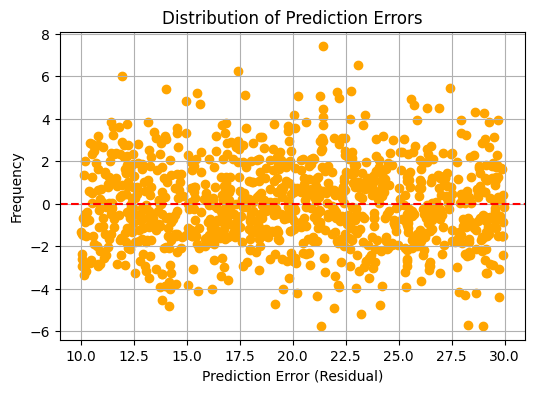

Mean Error: -0.000188


In [7]:
lr = LinearRegression(learning_rate=0.001, n_iters=100000)

lr.fit(data[['Net_Activity']], data['Energy'])

lr.predict(data[['Net_Activity']])

# Visualize the fitted line
plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', alpha=0.4, label='Data points')
plt.plot(data['Net_Activity'], lr.predict(data[['Net_Activity']]), color='red', label='Fitted line')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

# Resulting energy formula
print(f"Formula: {lr.weights[0]:.3} * Net_Activity + {lr.bias:.3}")

# Calculate and visualize prediction errors
error = lr.compute_error(data[['Net_Activity']], data['Energy'])

plt.figure(figsize=(6, 4))
plt.hist(error, bins=30, color='purple')
plt.xlabel('Prediction Error (Residual)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], error, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Prediction Error (Residual)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid(True)
plt.show()

# Print mean error
print(f"Mean Error: {np.mean(error):.3}")

**What is an unbiased estimator?**
 For regression, if the mean of the prediction errors (residuals) is zero, your model is an unbiased estimator of the target variable.

## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [8]:
data = pd.read_csv('mission2.csv')
train_ = data[data['split'] == 'train']
test_ = data[data['split'] == 'test']

Weights: [-0.14470356  0.00630314], Bias: 0.09336511088087285


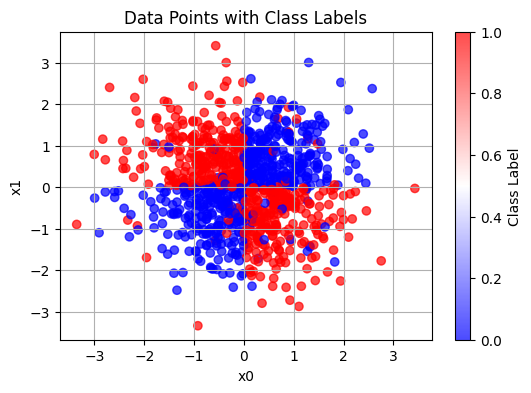

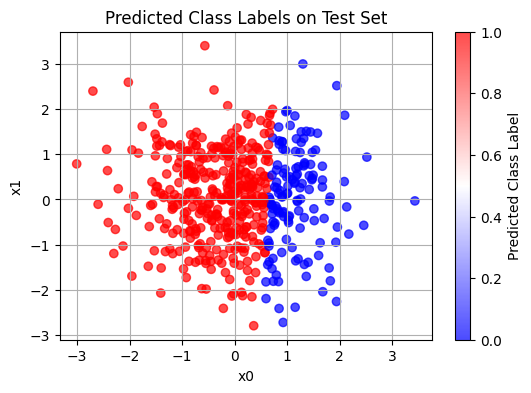

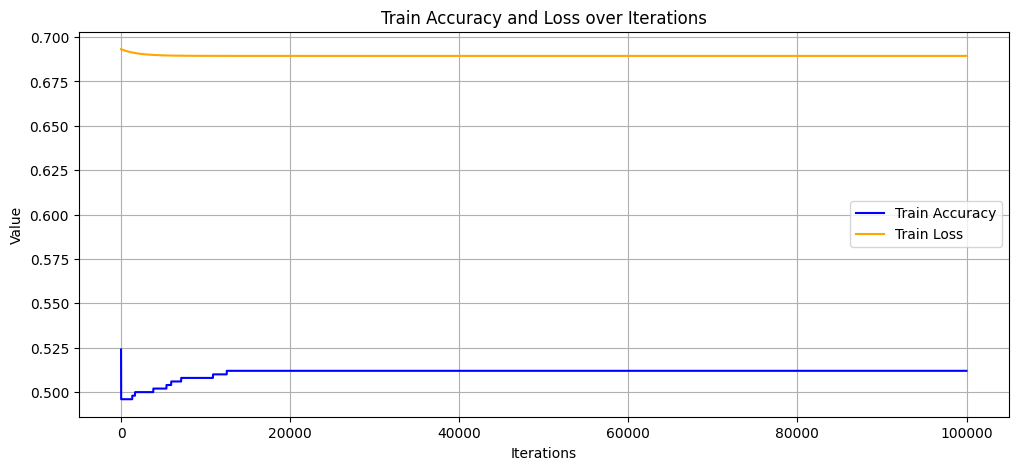

In [9]:
from gradient_descent import GradientDescent

gd = GradientDescent(learning_rate=0.001, n_iters=100000)

gd.fit(train_[['x0', 'x1']], train_['y'])

pred = gd.predict(test_[['x0', 'x1']])

# Plot data
plt.figure(figsize=(6, 4))
plt.scatter(data['x0'], data['x1'], c=data['y'], cmap='bwr', alpha=0.7)
plt.colorbar(label='Class Label')
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Data Points with Class Labels')
plt.grid(True)
plt.show()

# Plot predtictions
plt.figure(figsize=(6, 4))
plt.scatter(test_['x0'], test_['x1'], c=pred, cmap='bwr', alpha=0.7)
plt.colorbar(label='Predicted Class Label')
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Predicted Class Labels on Test Set')
plt.grid(True)
plt.show()

# Plot accuracies / losses over iterations
plt.figure(figsize=(12, 5))
plt.plot(gd.accuracies, label='Train Accuracy', color='blue')
plt.plot(gd.losses, label='Train Loss', color='orange')
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.title('Train Accuracy and Loss over Iterations')
plt.legend()
plt.grid(True)
plt.show()

**Why does the model show poor initial results?** With only two features (x0 and x1), a standard logistic regression model can only learn a linear decision boundary (a straight line in the feature space). The data is clearly not linearly separable, meaning that no straight line can effectively separate the two classes (0 and 1). As a result, the model can not classify the data points correctly, leading to poor performance.

**What can we do to improve the model?** To improve the model, we can engineer new features that capture the non-linear relationships in the data. For example, we can create a new feature that is the product of x0 and x1 (x0_x1 = x0 * x1). This new feature allows the logistic regression model to learn a more complex decision boundary that can better separate the classes.

**What is the model's inductive bias?** The inductive bias of logistic regression is that it assumes a linear relationship between the input features and the log-odds of the target variable. In other words, it expects that the classes can be separated by a straight line (or hyperplane) in the feature space. This means logistic regression will always try to find the best linear boundary, even if the true relationship is more complex or non-linear. This bias allows the model to generalize well when the linear assumption is appropriate, but limits its performance on problems that require more flexible, non-linear decision boundaries.

Weights: [-0.246537   -0.03476255 -3.00891389], Bias: 0.13435241427488576


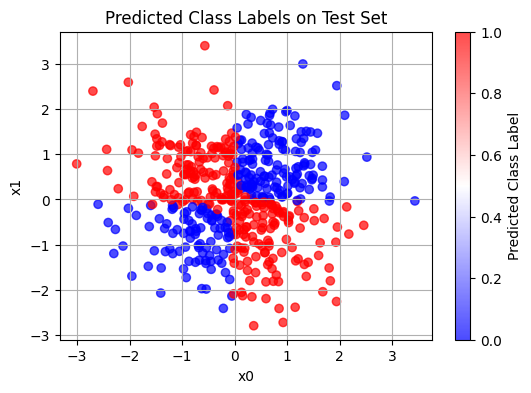

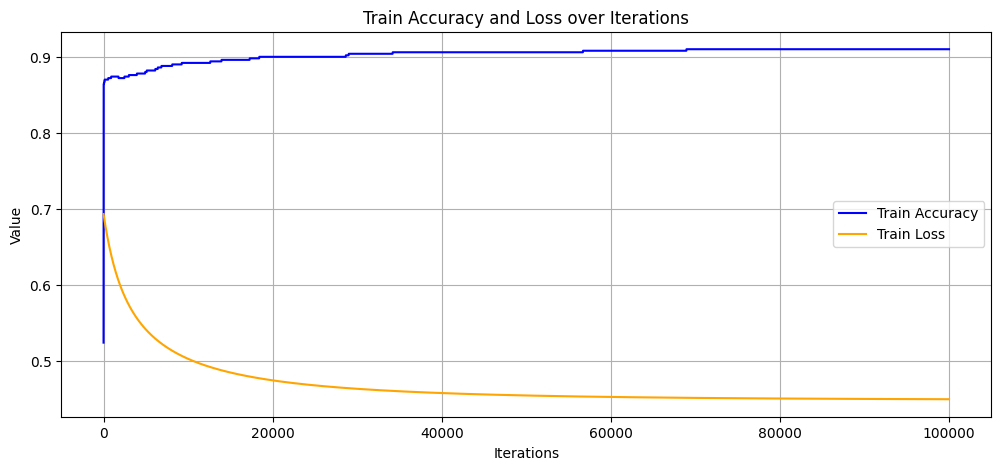

In [10]:
train_ = train_.copy()
test_ = test_.copy()
train_['x0_x1'] = train_['x0'] * train_['x1']
test_['x0_x1'] = test_['x0'] * test_['x1']

gd.fit(train_[['x0', 'x1', 'x0_x1']], train_['y'])

pred = gd.predict(test_[['x0', 'x1', 'x0_x1']])

# Plot predtictions
plt.figure(figsize=(6, 4))
plt.scatter(test_['x0'], test_['x1'], c=pred, cmap='bwr', alpha=0.7)
plt.colorbar(label='Predicted Class Label')
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Predicted Class Labels on Test Set')
plt.grid(True)
plt.show()

# Plot accuracies / losses over iterations
plt.figure(figsize=(12, 5))
plt.plot(gd.accuracies, label='Train Accuracy', color='blue')
plt.plot(gd.losses, label='Train Loss', color='orange')
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.title('Train Accuracy and Loss over Iterations')
plt.legend()
plt.grid(True)
plt.show()


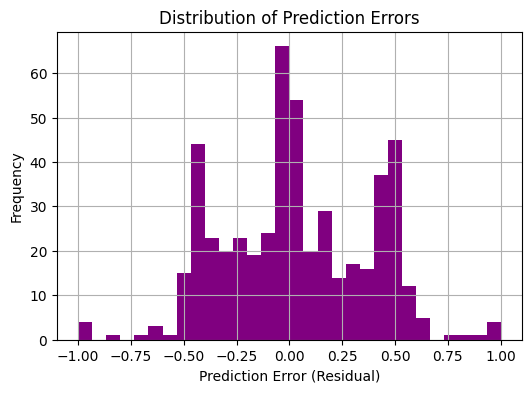

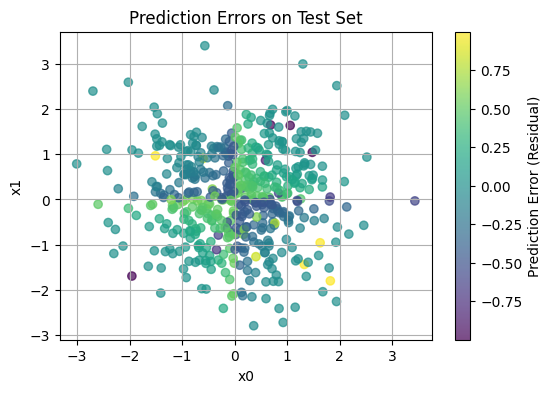

Mean Error: 0.0316


In [11]:
# Calculate and visualize prediction errors
error = gd.compute_error(test_[['x0', 'x1', 'x0_x1']], test_['y'])

# Histogram of errors
plt.figure(figsize=(6, 4))
plt.hist(error, bins=30, color='purple')
plt.xlabel('Prediction Error (Residual)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid(True)
plt.show()

# Scatter plot of errors
plt.figure(figsize=(6, 4))
plt.scatter(test_['x0'], test_['x1'], c=error, cmap='viridis', alpha=0.7)
plt.colorbar(label='Prediction Error (Residual)')
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Prediction Errors on Test Set')
plt.grid(True)
plt.show()

# Print mean error
print(f"Mean Error: {np.mean(error):.3}")


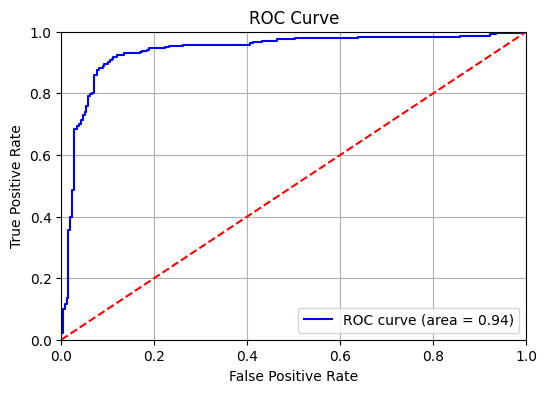

In [12]:
from sklearn.metrics import roc_curve, auc

# ROC
pred_proba = gd.predict_proba(test_[['x0', 'x1', 'x0_x1']])
fpr, tpr, thresholds = roc_curve(test_['y'], pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Could a decision tree solve the problem?** Yes, a decision tree can solve this problem because it can create non-linear decision boundaries by recursively splitting the feature space based on feature values. This allows it to capture complex patterns in the data that a linear model like logistic regression cannot.

Decision Tree Accuracy: 0.918


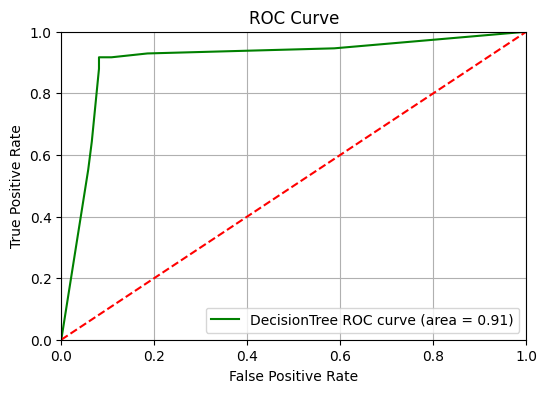

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc

# Descision tree classifier
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(train_[['x0', 'x1', 'x0_x1']], train_['y'])
pred_dt = dt.predict(test_[['x0', 'x1', 'x0_x1']])

# Accuracy
accuracy_dt = accuracy_score(test_['y'], pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.3}")

# Plot ROC for decision tree
pred_proba_dt = dt.predict_proba(test_[['x0', 'x1', 'x0_x1']])[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(test_['y'], pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure(figsize=(6, 4))
plt.plot(fpr_dt, tpr_dt, color='green', label=f'DecisionTree ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [14]:
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

def evaluate_dtc(dt, train_, test_):
  feature_cols = [c for c in train_.columns if c != 'target']  # All columns except 'target'
  
  # Train the model
  dt.fit(train_[feature_cols], train_['target'])

  # Make predictions
  pred = dt.predict(test_[feature_cols])

  # Evaluate accuracy
  accuracy = accuracy_score(test_['target'], pred)
  print(f"Decision Tree Accuracy: {accuracy:.3}")

  # Plot ROC for decision tree
  pred_proba = dt.predict_proba(test_[feature_cols])[:, 1]
  fpr, tpr, thresholds = roc_curve(test_['target'], pred_proba)
  roc_auc = auc(fpr, tpr)
  plt.figure(figsize=(6, 4))
  plt.plot(fpr, tpr, color='green', label=f'DecisionTree ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='red', linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()

**Let's decrypt the encrypted data stream.**

In [15]:
def decrypt_column(series):
    series = series.copy()
    # round to nearest int, check parity
    return ((series * 1000).round().astype(int) % 2 == 0).astype(np.int64)
  
def decrypt_data_stream(df):
    decrypted_df = df.copy()
    decrypted_df['data_stream_3'] = decrypt_column(df['data_stream_3'])
    return decrypted_df

decrypted_train = decrypt_data_stream(train)
decrypted_test = decrypt_data_stream(test)

**This does not look too good without hyperparameter tuning.**

Decision Tree Accuracy: 0.734


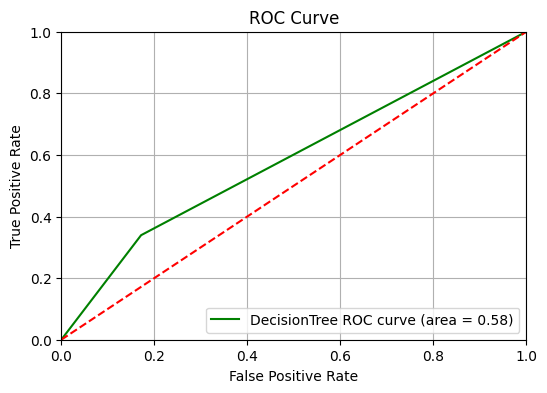

In [16]:
dt = DecisionTreeClassifier(random_state=42)
evaluate_dtc(dt, decrypted_train, decrypted_test)

**Let's look for some optimal hyperparameters using GridSearchCV.**

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

dt = DecisionTreeClassifier()
grid = GridSearchCV(dt, param_grid, cv=5, scoring='roc_auc')
grid.fit(decrypted_train[[c for c in decrypted_train.columns if c != 'target']], decrypted_train['target'])

print("Best parameters:", grid.best_params_)

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}


Decision Tree Accuracy: 0.809


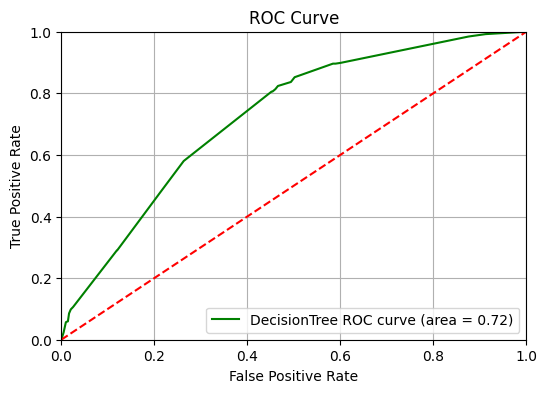

In [21]:
dt = DecisionTreeClassifier(**grid.best_params_, random_state=42)

evaluate_dtc(dt, decrypted_train, decrypted_test)

**Why is ROC AUC a better metric than accuracy in this case?**
ROC AUC is a more reliable evaluation metric than accuracy when class imbalance is present or when we want to evaluate how well the model separates classes across thresholds.

**Let's try Random Forrest Classifier.** A Random Forest Classifier, which is an ensemble of decision trees, can also effectively solve this problem. By combining the predictions of multiple decision trees, it can improve accuracy and robustness, making it well-suited for capturing complex patterns in the data.

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

param_grid = {
    "n_estimators": [100],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10]
}
grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring="roc_auc", n_jobs=-1)
grid_rf.fit(decrypted_train[[c for c in decrypted_train.columns if c != 'target']], decrypted_train['target'])

best_rf = grid_rf.best_estimator_
pred_rf = best_rf.predict(decrypted_test[[c for c in decrypted_test.columns if c != 'target']])
proba = best_rf.predict_proba(decrypted_test[[c for c in decrypted_test.columns if c != 'target']])[:, 1]

acc = accuracy_score(decrypted_test['target'], pred_rf)
roc_auc = roc_auc_score(decrypted_test['target'], proba)

print(f"Random Forest Accuracy: {acc:.3}")
print(f"Random Forest ROC AUC: {roc_auc:.3}")


Random Forest Accuracy: 0.813
Random Forest ROC AUC: 0.724


## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

**What is wrong with the dataset?** From looking at the datasets, we can see that the 'nexus_rating', a clear outlier being the only column with such large numbers, has its test data misplaced under 'grid_connections'. The rows in between seem to all have been shifted to its neighbor as well. Let's repair the data.

In [28]:
train_ = pd.read_csv('final_mission_train.csv')
test_ = pd.read_csv('final_mission_test.csv')

# Fix the column tampering in test data
# The real nexus_rating values are in the last column (grid_connections)
# We need to shift all columns after nexus_rating one position to the right

# Store the real nexus_rating values (currently in grid_connections column)
real_nexus_rating = test_['grid_connections'].copy()

# Get all column names
cols = test_.columns.tolist()

# Find the position of nexus_rating column (should be index 1)
nexus_rating_idx = cols.index('nexus_rating')

# Shift columns: everything from nexus_rating onwards moves one position right
# But grid_connections (last column) goes to nexus_rating position
for i in range(len(cols) - 1, nexus_rating_idx, -1):
    test_[cols[i]] = test_[cols[i-1]].copy()

# Put the real nexus_rating values in the correct position
test_['nexus_rating'] = real_nexus_rating

print(train_.head(3))
print(test_.head(3))

   ownership_type  nexus_rating  energy_footprint  core_reactor_size  \
0             3.0     7139520.0              59.2               12.5   
1             NaN    10500000.0              88.0               14.2   
2             3.0     9019650.0              78.5               22.5   

   harvesting_space  vertical_alignment  power_chambers  energy_flow_design  \
0              31.0                 2.0             2.0                 NaN   
1              48.0                18.0             3.0                 1.0   
2              40.8                12.0             3.0                 NaN   

   upper_collector_height  shared_conversion_units  isolated_conversion_units  \
0                    2.65                      0.0                        2.0   
1                     NaN                      2.0                        0.0   
2                    2.65                      0.0                        2.0   

   internal_collectors  external_collectors  ambient_harvesters  \
0 

Now let us also fix the missing data.

In [29]:
from sklearn.impute import KNNImputer, SimpleImputer

# Tried Imputing but it did not improve results :(
# df_numeric = [
#     'energy_footprint',
#     'core_reactor_size',
#     'harvesting_space',
#     'vertical_alignment',
#     'power_chambers',
#     'energy_flow_design',
#     'upper_collector_height',
#     'shared_conversion_units',
#     'isolated_conversion_units',
#     'internal_collectors',
#     'external_collectors',
#     'ambient_harvesters',
#     'shielded_harvesters',
#     'grid_connections']
# df_categorical = ['ownership_type', 'efficiency_grade']

# # Only use KNNImputer for numeric columns (categorical should still use most frequent)
# knn_imputer = KNNImputer(n_neighbors=5)
# train_[df_numeric] = knn_imputer.fit_transform(train_[df_numeric])
# test_[df_numeric] = knn_imputer.transform(test_[df_numeric])

# # Categorical imputer (most frequent, as before)
# categorical_imputer = SimpleImputer(strategy='most_frequent')
# train_[df_categorical] = categorical_imputer.fit_transform(train_[df_categorical])
# test_[df_categorical] = categorical_imputer.transform(test_[df_categorical])
# print('KNN Imputation complete. Any missing left in train?:', train_.isnull().sum().sum())
# print('KNN Imputation complete. Any missing left in test?:', test_.isnull().sum().sum())

# Instead drop rows with missing values
train_ = train_.dropna()
test_ = test_.dropna()

print(train_.head(3))
print(test_.head(3))

     ownership_type  nexus_rating  energy_footprint  core_reactor_size  \
77              1.0     6700000.0              64.1               12.7   
82              2.0    12500000.0              73.2               10.2   
234             0.0     6700000.0              51.3                9.0   

     harvesting_space  vertical_alignment  power_chambers  energy_flow_design  \
77               34.0                15.0             2.0                 1.0   
82               44.2                10.0             3.0                 1.0   
234              34.0                 1.0             2.0                 2.0   

     upper_collector_height  shared_conversion_units  \
77                     3.20                      1.0   
82                     3.14                      1.0   
234                    2.90                      1.0   

     isolated_conversion_units  internal_collectors  external_collectors  \
77                         0.0                  0.0                  1.0   
8

**Why RMLSE?** RMLSE is a good metric for this problem because it is effective when working with targets that span several orders of magnitude, as it penalizes underestimations more than overestimations.

In [36]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [40]:
# Ensemble Learning Implementation for Final Mission

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import xgboost as xgb

# Prepare the data for modeling
X_train = train_.drop(['nexus_rating'], axis=1)
y_train = train_['nexus_rating']
X_test = test_.drop(['nexus_rating'], axis=1)
y_test = test_['nexus_rating']

# Encode categorical variables
le_ownership = LabelEncoder()
le_efficiency = LabelEncoder()

X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

X_train_encoded['ownership_type'] = le_ownership.fit_transform(X_train['ownership_type'])
X_test_encoded['ownership_type'] = le_ownership.transform(X_test['ownership_type'])

X_train_encoded['efficiency_grade'] = le_efficiency.fit_transform(X_train['efficiency_grade'])
X_test_encoded['efficiency_grade'] = le_efficiency.transform(X_test['efficiency_grade'])

print(f"Training set shape: {X_train_encoded.shape}")
print(f"Test set shape: {X_test_encoded.shape}")

Training set shape: (1284, 16)
Test set shape: (518, 16)


=== BAGGING: Random Forest ===
Random Forest RMSLE: 0.2563
Target RMSLE ≤ 0.294: PASSED


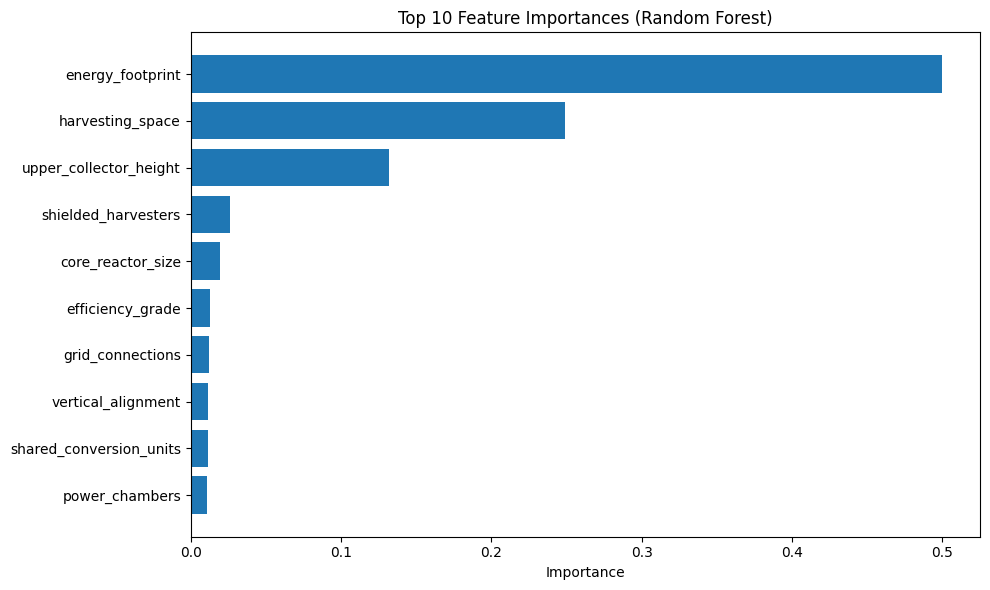

In [41]:
# Method 1: Bagging - Random Forest
print("=== BAGGING: Random Forest ===")

rf_model = RandomForestRegressor(
    n_estimators=100,    # Number of trees
    max_depth=10,        # Prevent overfitting
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_encoded, y_train)
rf_pred = rf_model.predict(X_test_encoded)
rf_rmsle = rmsle(y_test, rf_pred)

print(f"Random Forest RMSLE: {rf_rmsle:.4f}")
print(f"Target RMSLE ≤ 0.294: {'PASSED' if rf_rmsle <= 0.294 else 'FAILED'}")

# Feature importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': X_train_encoded.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

=== BOOSTING: Gradient Boosting ===
Gradient Boosting RMSLE: 0.2686
Target RMSLE ≤ 0.294: PASSED


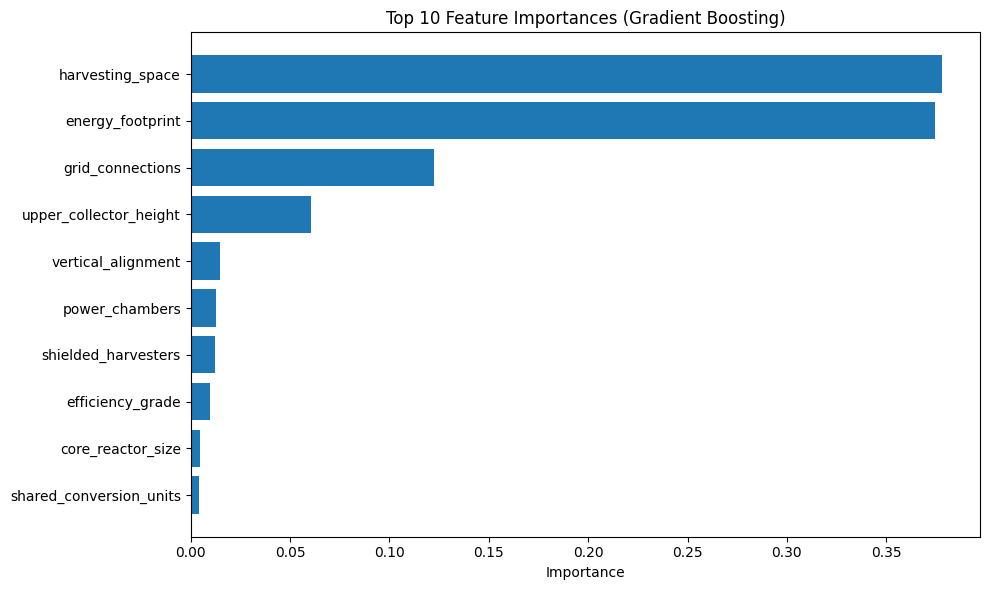


=== ADVANCED BOOSTING: XGBoost ===
XGBoost RMSLE: 0.2565
Target RMSLE ≤ 0.294: PASSED


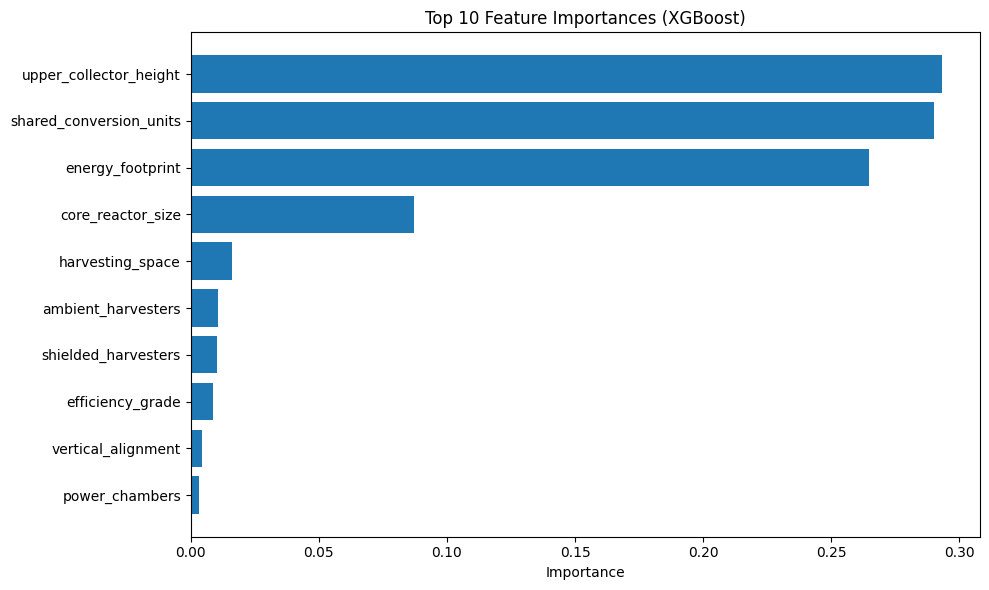

In [47]:
# Method 2: Boosting - Gradient Boosting
print("=== BOOSTING: Gradient Boosting ===")

gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,   # How much each tree contributes
    max_depth=6,
    random_state=42
)

gb_model.fit(X_train_encoded, y_train)
gb_pred = gb_model.predict(X_test_encoded)
gb_rmsle = rmsle(y_test, gb_pred)

print(f"Gradient Boosting RMSLE: {gb_rmsle:.4f}")
print(f"Target RMSLE ≤ 0.294: {'PASSED' if gb_rmsle <= 0.294 else 'FAILED'}")

# Feature importance from Gradient Boosting
gb_feature_importance = pd.DataFrame({
    'feature': X_train_encoded.columns,
    'importance': gb_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(gb_feature_importance['feature'][:10], gb_feature_importance['importance'][:10])
plt.title('Top 10 Feature Importances (Gradient Boosting)')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# XGBoost (Advanced Boosting)
print("\n=== ADVANCED BOOSTING: XGBoost ===")

xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

xgb_model.fit(X_train_encoded, y_train)
xgb_pred = xgb_model.predict(X_test_encoded)
xgb_rmsle = rmsle(y_test, xgb_pred)

print(f"XGBoost RMSLE: {xgb_rmsle:.4f}")
print(f"Target RMSLE ≤ 0.294: {'PASSED' if xgb_rmsle <= 0.294 else 'FAILED'}")

# Feature importance from XGBoost
xgb_feature_importance = pd.DataFrame({
    'feature': X_train_encoded.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(xgb_feature_importance['feature'][:10], xgb_feature_importance['importance'][:10])
plt.title('Top 10 Feature Importances (XGBoost)')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [49]:
# Method 3: Stacking - Meta-Model Ensemble
print("=== STACKING: Meta-Model Ensemble ===")

# Simple averaging ensemble first
simple_avg_pred = (rf_pred + gb_pred + xgb_pred) / 3
simple_avg_rmsle = rmsle(y_test, simple_avg_pred)

print(f"Simple Average Ensemble RMSLE: {simple_avg_rmsle:.4f}")
print(f"Target RMSLE ≤ 0.294: {'PASSED' if simple_avg_rmsle <= 0.294 else 'FAILED'}")

# Weighted ensemble
weights = [0.4, 0.3, 0.3]  # RF, GB, XGB weights
weighted_pred = (weights[0] * rf_pred + 
                weights[1] * gb_pred + 
                weights[2] * xgb_pred)
weighted_rmsle = rmsle(y_test, weighted_pred)

print(f"\nWeighted Ensemble RMSLE: {weighted_rmsle:.4f}")
print(f"Target RMSLE ≤ 0.294: {'PASSED' if weighted_rmsle <= 0.294 else 'FAILED'}")

# Compare all methods
results = pd.DataFrame({
    'Method': ['Random Forest', 'Gradient Boosting', 'XGBoost', 
               'Simple Average', 'Weighted Average'],
    'RMSLE': [rf_rmsle, gb_rmsle, xgb_rmsle, simple_avg_rmsle, weighted_rmsle],
    'Passes Target': [rf_rmsle <= 0.294, gb_rmsle <= 0.294, xgb_rmsle <= 0.294,
                     simple_avg_rmsle <= 0.294, weighted_rmsle <= 0.294]
})

=== STACKING: Meta-Model Ensemble ===
Simple Average Ensemble RMSLE: 0.2558
Target RMSLE ≤ 0.294: PASSED

Weighted Ensemble RMSLE: 0.2555
Target RMSLE ≤ 0.294: PASSED


In [35]:
print("\n=== ENSEMBLE RESULTS SUMMARY ===")
print(results.to_string(index=False))


=== ENSEMBLE RESULTS SUMMARY ===
           Method    RMSLE  Passes Target
    Random Forest 0.256294           True
Gradient Boosting 0.268576           True
          XGBoost 0.256544           True
   Simple Average 0.255770           True
 Weighted Average 0.255457           True


**How does these ensembling techniques work?**

**Bagging** involves training multiple instances of the same model on different random subsets of the training data and averaging their predictions. This reduces variance and helps prevent overfitting. With Random Forests, each tree is trained on a bootstrap sample of the data, and their predictions are averaged to produce the final output.

**Boosting** builds models sequentially, where each new model focuses on correcting the errors of the previous ones. This approach reduces bias and can lead to better performance on complex datasets. Gradient Boosting and XGBoost are popular boosting algorithms that combine weak learners (usually decision trees) to create a strong predictive model.

**Averaging** combines the predictions of multiple models by taking their average. This simple technique can improve prediction accuracy by reducing variance and smoothing out individual model errors. It is particularly effective when the individual models are diverse and make uncorrelated errors.

**How do you make shure the model works great on unseen data?** To ensure the model performs well on unseen data, we can use techniques such as cross-validation, where the training data is split into multiple folds to train and validate the model on different subsets. This helps assess the model's generalization ability. Additionally, we can monitor performance metrics on a separate validation set during training to detect overfitting. Regularization techniques and hyperparameter tuning can also be employed to improve model robustness. Finally, using ensemble methods can help reduce variance and improve overall performance on new data.